
# 실습과제

- 농작물 배송
- 인스타카트
- 추천시스템을 만드시오

##### 추천 시스템 종류 생각
1. 요일, 시간별 상품추천
2. 카트에 넣으면 다음 아이템 추천
3. 사용자별 통계적 많이 팔리는 상품? 대분류 소분류?
4. 대분류별 많이 팔리는 소분류 추천
5. 재구매 주기가 긴 상품들?
6. 재구매 주기가 짧은 상품 추천??
7. 처음온 고객 추천9. 재구매가 많은 상품
10. 구매한 상품이 어떤 상품과 함께 구매되었는가



8. 사용자 맞춤 추천


### opp
- add_to_cart_order : 구매한 순서 ,
- eordered : 구매 이력이 있음

### orders
- order_number 누적주문 횟수 user_id별   - 신뢰도 있는 유저
- order_dow 무슨 요일인가 - 주말 평일 차이?
- order_hour_of_day 시간정보 - 몇시에 핫하지? 오전 오후 저녁 구매 항목 차이?
- days_since_prior_order 마지막 주문으로부터 지난 날짜 - 짧은 주기로 사는 상품은?

### products
- aisle_id 소분류 (우유, 치즈, 요구르트)
- department_id 대분류 (유제품, 빵, 생활용품)

In [1]:
import pandas as pd

In [2]:
opp = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [46]:
opp

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [3]:
# 데이터가 너무 많음 
# product는 절대로 손대면 안됨
# opp는 자르기가 애매하다

# orders에서 연결고리 필터링을 해야한다.
orders['days_since_prior_order'].fillna(-1, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_13260\388534187.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['days_since_prior_order'].fillna(-1, inplace=True)


In [4]:
opp_c = pd.merge(opp, products, on='product_id')

In [38]:
opp_c

,order_id,product_id,add_to_cart_order,reordered,count,product_name,aisle_id,department_id
0,2,33120,1,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,1,Michigan Organic Kale,83,4
2,2,9327,3,0,1,Garlic Powder,104,13
3,2,45918,4,1,1,Coconut Butter,19,13
4,2,30035,5,0,1,Natural Sweetener,17,13
...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,1,Free & Clear Natural Dishwasher Detergent,74,17
32434485,3421083,11352,7,0,1,Organic Mini Sandwich Crackers Peanut Butter,78,19
32434486,3421083,4600,8,0,1,All Natural French Toast Sticks,52,1
32434487,3421083,24852,9,1,1,Banana,24,4


In [5]:
df_full = pd.merge(orders, opp_c, on='order_id')

In [44]:
df_full.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,count,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,-1.0,196,1,0,1,Soda,77,7
1,2539329,1,prior,1,2,8,-1.0,14084,2,0,1,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,-1.0,12427,3,0,1,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,-1.0,26088,4,0,1,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,-1.0,26405,5,0,1,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,prior,2,3,7,15.0,196,1,1,1,Soda,77,7
6,2398795,1,prior,2,3,7,15.0,10258,2,0,1,Pistachios,117,19
7,2398795,1,prior,2,3,7,15.0,12427,3,1,1,Original Beef Jerky,23,19
8,2398795,1,prior,2,3,7,15.0,13176,4,0,1,Bag of Organic Bananas,24,4
9,2398795,1,prior,2,3,7,15.0,26088,5,1,1,Aged White Cheddar Popcorn,23,19


In [45]:
days = []
for i in range(7):
    hours = []
    day = df_full[df_full['order_dow'] == i].reset_index(drop=True)
    for j in range(24):
        hour = day[day['order_hour_of_day'] == j]
        if len(hour) == 0:
            continue

        hours.append(hour)
    days.append(hours)

In [47]:
index = 'user_id'
column = 'product_name'
values = 'add_to_cart_order'
day_ls = days[0]  
hour_pivot = []

In [48]:
hour_df = day_ls[3]
pivot = hour_df.pivot_table(index=index, columns=column, values=values).fillna(0)

In [49]:
test_corr = pivot.corr()

In [16]:
test_corr

product_name,".5\"" Waterproof Tape",0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Organic Greek Vanilla Yogurt,0% Fat Strawberry Greek Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",...,Zucchini Squash,ZzzQuil Nighttime Liquid Sleep-Aid Twin Pack,eat your vegetables Vegetable Chips Sour Cream & Onion,gelato Coffee Toffee,in 100% Juice Mixed Fruit,of Hanover 100 Calorie Pretzels Mini,of Norwich Original English Mustard Powder Double Superfine,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Olive Oil Mayonnaise
product_name,,,,,,,,,,,,,,,,,,,,,
".5\"" Waterproof Tape",1.000000,-0.000301,-0.000632,-0.000301,-0.000387,-0.000301,-0.000301,-0.000500,-0.000301,-0.000400,...,-0.000480,-0.000301,-0.000301,-0.000301,-0.000301,-0.000507,-0.000301,-0.000527,-0.000301,-0.000301
0% Fat Blueberry Greek Yogurt,-0.000301,1.000000,-0.000632,-0.000301,-0.000387,-0.000301,-0.000301,-0.000500,-0.000301,-0.000400,...,-0.000480,-0.000301,-0.000301,-0.000301,-0.000301,-0.000507,-0.000301,-0.000527,-0.000301,-0.000301
0% Fat Free Organic Milk,-0.000632,-0.000632,1.000000,-0.000632,-0.000814,-0.000632,-0.000632,-0.001050,-0.000632,-0.000842,...,-0.001010,-0.000632,-0.000632,-0.000632,-0.000632,-0.001065,-0.000632,-0.001107,-0.000632,-0.000632
0% Fat Greek Yogurt Black Cherry on the Bottom,-0.000301,-0.000301,-0.000632,1.000000,-0.000387,-0.000301,-0.000301,-0.000500,-0.000301,-0.000400,...,-0.000480,-0.000301,-0.000301,-0.000301,-0.000301,-0.000507,-0.000301,-0.000527,-0.000301,-0.000301
0% Fat Organic Greek Vanilla Yogurt,-0.000387,-0.000387,-0.000814,-0.000387,1.000000,-0.000387,0.936316,-0.000644,-0.000387,-0.000516,...,-0.000619,-0.000387,-0.000387,-0.000387,-0.000387,-0.000653,-0.000387,-0.000678,-0.000387,-0.000387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
of Hanover 100 Calorie Pretzels Mini,-0.000507,-0.000507,-0.001065,-0.000507,-0.000653,-0.000507,-0.000507,-0.000842,-0.000507,-0.000674,...,-0.000809,-0.000507,-0.000507,-0.000507,-0.000507,1.000000,-0.000507,-0.000887,-0.000507,-0.000507
of Norwich Original English Mustard Powder Double Superfine,-0.000301,-0.000301,-0.000632,-0.000301,-0.000387,-0.000301,-0.000301,-0.000500,-0.000301,-0.000400,...,-0.000480,-0.000301,-0.000301,-0.000301,-0.000301,-0.000507,1.000000,-0.000527,-0.000301,-0.000301
smartwater® Electrolyte Enhanced Water,-0.000527,-0.000527,-0.001107,-0.000527,-0.000678,-0.000527,-0.000527,-0.000875,-0.000527,-0.000701,...,-0.000841,-0.000527,-0.000527,-0.000527,-0.000527,-0.000887,-0.000527,1.000000,-0.000527,-0.000527


In [50]:
search = 'meat'

for product in test_corr.columns:
    if search.casefold() in product.casefold():
        print(product)


Beef Stew Meat
Classic Meatless Meatballs
Freshly made pasta, rich meat sauce and Real Mozzarella cheese Lasagna with Meat & Sauce
Freshly made spaghetti tossed with meatballs in a seasoned tomato sauce Spaghetti with Meatballs
Homestyle Classics Meatloaf
In Tomato Sauce Spaghetti & Meatballs
Italian Style Meatballs
Light & Lean Spaghetti Italiano with Meatless Meatballs
Meat Loaf Seasoning Mix
Meatless and Soy Free Sausage Patties
Naturals Applewood Smoked Ham Lunchmeat
Organic Chicken Meatballs
Singles Deep Dish Meat Trio Pizzas
Sliced Varzi Salami Meat
Spaghetti with Meat Sauce Pasta Meal
Spaghetti with Meatballs
Swedish Meatballs
Teriyaki & Pineapple Chicken Meatballs
Tuna & Crab Meat Entree in Gravy Cat Food


In [51]:
interested = 'Tuna & Crab Meat Entree in Gravy Cat Food' 
test_corr.sort_values(by=interested, ascending=False)[interested].head(10)

product_name
Alkalized Water                                                    1.000000
Tuna & Crab Meat Entree in Gravy Cat Food                          1.000000
Kitten & Adult Select Cuts Chicken Chunks Cat Food                 1.000000
Organic Cold-Pressed Orange Juice                                  1.000000
Direct Trade Organic El Gallo Breakfast Blend Whole Bean Coffee    0.536149
Strawberry Rhubarb Yoghurt                                         0.104655
Banana                                                             0.076812
Triple Action Dish Liquid Orange                                  -0.001209
Chao, Vegan, Tomato Cayenne, Slices                               -0.001209
Swiss Cheese Block                                                -0.001209
Name: Tuna & Crab Meat Entree in Gravy Cat Food, dtype: float64

In [56]:
days = []
for i in range(7):
    day = df_full[df_full['order_dow'] == i].reset_index(drop=True)
    day['count'] = 1
    days.append(day)

In [97]:
days_bestsell = []

for day in days:
    item_rank = day.groupby(by=['product_id']).agg({'count':'sum'}).reset_index()
    item_rank.sort_values('count', ascending=False)
    daily_rank = pd.merge(item_rank, products, on='product_id')
    f_daily_rank = daily_rank[daily_rank['count']>=5000]
    days_bestsell.append(f_daily_rank.sort_values('count', ascending=False).reset_index(drop=True))

<Axes: >

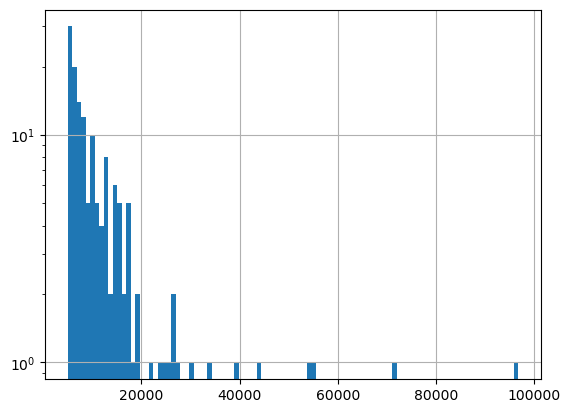

In [98]:
days_bestsell[0]['count'].hist(bins=100, log=True)

In [112]:
days_pivot = []
days_corr = []
for bestsell in days_bestsell :
    days_corr.append(bestsell.pivot_table(index='department_id', columns='product_name', values='count').fillna(0).corr())

In [113]:
days_corr[0]

product_name,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Baby Spinach,Bag of Organic Bananas,Banana,Bartlett Pears,...,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Vanilla Almond Breeze Almond Milk,Watermelon Chunks,Whipped Cream Cheese,Whole Milk,Yellow Bell Pepper,Yellow Onions
product_name,,,,,,,,,,,,,,,,,,,,,
100% Raw Coconut Water,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
100% Recycled Paper Towels,-0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
100% Whole Wheat Bread,-0.1,-0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2% Reduced Fat Milk,-0.1,-0.1,-0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,1.0,1.0,1.0,1.0,-0.1,1.0,1.0,-0.1,-0.1
Apple Honeycrisp Organic,-0.1,-0.1,-0.1,-0.1,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.1,-0.1,-0.1,-0.1,-0.1,1.0,-0.1,-0.1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Watermelon Chunks,-0.1,-0.1,-0.1,-0.1,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.1,-0.1,-0.1,-0.1,-0.1,1.0,-0.1,-0.1,1.0,1.0
Whipped Cream Cheese,-0.1,-0.1,-0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,1.0,1.0,1.0,1.0,-0.1,1.0,1.0,-0.1,-0.1
Whole Milk,-0.1,-0.1,-0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,...,-0.1,1.0,1.0,1.0,1.0,-0.1,1.0,1.0,-0.1,-0.1


In [35]:
len(opp)

32434489

In [6]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [20]:
opp['count'] = 1
item_num = opp.groupby(by='order_id').agg({'count':'sum'}).reset_index()
item_num.columns = ['order_id', 'item_num']
orders_in = pd.merge(orders, item_num, on='order_id')

<Axes: >

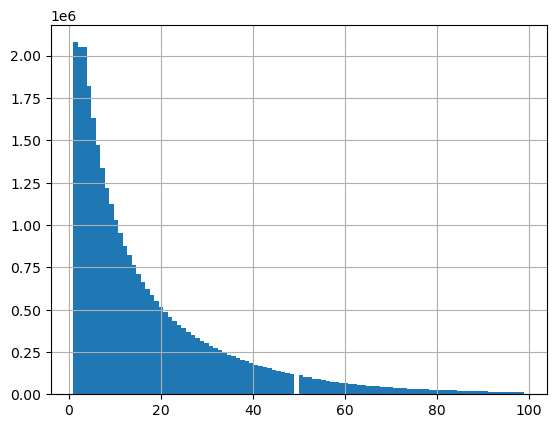

In [7]:
df_full['order_number'].hist(bins=100)

In [6]:
heavy_cus = df_full[df_full['order_number'] >= 50]
len(heavy_cus)

2098761

In [9]:
heavy_cus

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
2839,3094422,27,prior,50,4,14,1.0,43340,1,0,Bay Blue Cheese,2,16
2840,3094422,27,prior,50,4,14,1.0,1194,2,1,Natural Artisan Water,115,7
2841,3094422,27,prior,50,4,14,1.0,14233,3,1,Natural Artesian Water,115,7
2842,3094422,27,prior,50,4,14,1.0,41836,4,0,Rainbow Crisps Fig And Olive Crackers,78,19
2843,3094422,27,prior,50,4,14,1.0,49174,5,0,Raincoast Crisps Cranberry And Hazelnut Crackers,78,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433455,2986341,206206,prior,66,3,9,14.0,45139,2,1,Honey Mustard Avocado Oil Dressing,89,13
32433456,2986341,206206,prior,66,3,9,14.0,21850,3,0,Waffle Cut Sweet Potato Seasoned Fries,129,1
32433457,1904200,206206,prior,67,0,13,11.0,11520,1,1,Large Alfresco Eggs,86,16
32433458,1904200,206206,prior,67,0,13,11.0,23029,2,1,Organic Uncured Sliced Black Forest Ham,96,20


In [7]:
days = []
for i in range(7):
    hours = []
    day = heavy_cus[heavy_cus['order_dow'] == i].reset_index(drop=True)
    days.append(day)

In [8]:
test_pivot = days[0].pivot_table(index='order_id', columns='product_name', values=['order_dow', 'order_hour_of_day'], aggfunc='count').fillna(0)

In [ ]:
test_corr = test_pivot.corr() 

In [ ]:
test_corr

#### 강사님 풀이
1. 관계를 아이템 - 구매자로 다시 쓰기
2. groupby를 활용하여 product_id, user_id로 그룹화 count를 통하여 아이템, 유저, 구매횟수로 피벗테이블 만들기
    - reordered를 활용하여 만들수도 있다
3. 사이즈가 크기 때문에 필터링
4. 유저를 제외하고 각 상품별로 판매수를 groupby로 모음
5. 많이 팔리지 않은 상품들을 제거함
6. 상품을 제외하고 각 유저별 구매횟수를 모음
7. 구매 횟수가 적은 유저들을 제거
8. pivot 시작

### 연결 강도의 다른 관점
- A가 100번 쇼핑하면서 특정제품을 10번 사는것과 B가 10번 쇼핑하면서 특정제품을 10번사는 것은 다르게 계산해야 하지 않을까?
- orders 테이블에서 user_id로 모아서 주문 횟수를 모음(user_freq)
- 각 상품 - 유저 구매 횟수 테이블에서 카운트를 user_freq로 나누어 ratio(선호도)를 만듦

### 좀 더 고민해 볼것
- 요일과 시간 정보를 활용
- 월화수목, 금토일 분리
- 오전 오후 시간대 분리
- 각각 데이터를 분리해서 다르게 추천해줄 수 있을까?

- 고객 : 기존고객, 신규고객
- 신규고객에게 우리 마트에서 추천상품 이건꼭사야해 서비스